In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
%matplotlib inline

In [2]:
df = pd.read_pickle('../data/ALL.pkl')
print(df.shape)
print(df.columns)
df.head()

(7440252, 17)
Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'receipt_desc', 'memo_cd', 'memo_text', 'form_tp',
       'file_num', 'tran_id', 'election_tp'],
      dtype='object')


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
contb_receipt_dt,,,,,,,,,,,,,,,,,
2006-08-30,C00580100,P80001571,"Trump, Donald J.","FOSTER, SYLVIA L DR.",MIDDLETOWN,DE,19709,N.P.H.S.,PHYSICIAN,400.0,NaN,X,NaN,SA18,1104813,SA18.2452270,NaN
2013-10-01,C00458844,P60006723,"Rubio, Marco","MARGULIES, STANLEY I. DR.",ISLAMORADA,FL,330363303,SELF-EMPLOYED,PHYSICIAN,-20.0,NaN,X,TRANSFER FROM RUBIO VICTORY,SA18,1029436,SA18.621507.2.0615,P2016
2013-10-01,C00458844,P60006723,"Rubio, Marco","MARGULIES, STANLEY I. DR.",ISLAMORADA,FL,330363303,SELF-EMPLOYED,PHYSICIAN,20.0,NaN,X,TRANSFER FROM RUBIO VICTORY,SA18,1029436,SA18.621507.3.0615,G2016
2013-10-04,C00458844,P60006723,"Rubio, Marco","ACOSTA, ADELFA MS.",MIAMI SPRINGS,FL,331666027,RETIRED,RETIRED,80.0,NaN,X,TRANSFER FROM RUBIO VICTORY,SA18,1029436,SA18.621975.3.0615,G2016
2013-10-04,C00458844,P60006723,"Rubio, Marco","ZOLDAN, GERALD MR.",CHICAGO,IL,606115643,MORLISEY ASSOCIATES INC.,EXECUTIVE,100.0,NaN,X,TRANSFER FROM RUBIO VICTORY,SA18,1029436,SA18.621490.3.0615,G2016


The columns that will be kept:
* cand_nm:
* contbr_nm:
* contbr_city:
* contbr_st:
* contbr_zip:
* contbr_employer:
* contbr_occupation:
* contb_receipt_amt:
* receipt_desc:
* file_num: This is a unique number assigned to a report and all its associated transactions.  Depending on the analysis, more research in to this column might be needed.
* tran_id: This is a unique identifier permanently associated with each itemization or transaction appearing in an FEC electronic file.  It will be used as the unique identifier for each row in case that is required.
* election_tp: 

Drop the following columns:
* cmte_id: This column is the Committee ID which is a 9-character alpha-numeric code assigned to a committee by the Federal Election Commission. It will not be needed for any type of analysis.
* cand_id: This column is the Candidate ID which is a 9-character alpha-numeric code assigned to a candidate by the Federal Election Commission. Candidates will be identified by their name, so this column is not needed for the analysis.
* form_tp: This is what schedule and line number the reporting committee reported a specific transaction and will not be used in the analysis.
* memo_code: This indicates whether or not the reporting committee has provided additional text to describe a specific contribution.  This is redundant, so the memo_text will be kept for further research.

In [3]:
df = df.drop(columns = ['cmte_id', 'cand_id', 'form_tp', 'memo_code'])
print(df.shape)
print(df.columns)
df.head()

(7440252, 14)
Index(['cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip',
       'contbr_employer', 'contbr_occupation', 'contb_receipt_amt',
       'receipt_desc', 'memo_cd', 'memo_text', 'file_num', 'tran_id',
       'election_tp'],
      dtype='object')


,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,receipt_desc,memo_cd,memo_text,file_num,tran_id,election_tp
contb_receipt_dt,,,,,,,,,,,,,,
2006-08-30,"Trump, Donald J.","FOSTER, SYLVIA L DR.",MIDDLETOWN,DE,19709,N.P.H.S.,PHYSICIAN,400.0,NaN,X,NaN,1104813,SA18.2452270,NaN
2013-10-01,"Rubio, Marco","MARGULIES, STANLEY I. DR.",ISLAMORADA,FL,330363303,SELF-EMPLOYED,PHYSICIAN,-20.0,NaN,X,TRANSFER FROM RUBIO VICTORY,1029436,SA18.621507.2.0615,P2016
2013-10-01,"Rubio, Marco","MARGULIES, STANLEY I. DR.",ISLAMORADA,FL,330363303,SELF-EMPLOYED,PHYSICIAN,20.0,NaN,X,TRANSFER FROM RUBIO VICTORY,1029436,SA18.621507.3.0615,G2016
2013-10-04,"Rubio, Marco","ACOSTA, ADELFA MS.",MIAMI SPRINGS,FL,331666027,RETIRED,RETIRED,80.0,NaN,X,TRANSFER FROM RUBIO VICTORY,1029436,SA18.621975.3.0615,G2016
2013-10-04,"Rubio, Marco","ZOLDAN, GERALD MR.",CHICAGO,IL,606115643,MORLISEY ASSOCIATES INC.,EXECUTIVE,100.0,NaN,X,TRANSFER FROM RUBIO VICTORY,1029436,SA18.621490.3.0615,G2016


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7440252 entries, 2006-08-30 to 2016-12-31
Data columns (total 14 columns):
cand_nm              object
contbr_nm            object
contbr_city          object
contbr_st            object
contbr_zip           object
contbr_employer      object
contbr_occupation    object
contb_receipt_amt    float64
receipt_desc         object
memo_cd              object
memo_text            object
file_num             int64
tran_id              object
election_tp          object
dtypes: float64(1), int64(1), object(12)
memory usage: 851.5+ MB


In [15]:
print(df.election_tp.value_counts())
# Only interested in contributions for the Primary and General Elections in 2016
# O2016 is also included for Jill Stein contributions
# Why are there other contributions anyway?
print(df.loc[df.election_tp.isin(['O2016'])].cand_nm.value_counts())

df = df.loc[df.election_tp.isin(['P2016', 'G2016', 'O2016'])]

print(df.election_tp.value_counts())

P2016    4789297
G2016    2634954
O2016       1891
P2020         76
P2018          3
P2012          3
P2015          2
G2015          2
G2106          1
P2019          1
Name: election_tp, dtype: int64
Stein, Jill    1891
Name: cand_nm, dtype: int64
P2016    4789297
G2016    2634954
O2016       1891
Name: election_tp, dtype: int64


In [16]:
# Remove all contribution amounts that are negative
#df.contb_receipt_amt[df.contb_receipt_amt <=0].value_counts()
df[df.contb_receipt_amt <=0].memo_text.value_counts()

try:
    assert len(df.contb_receipt_amt[df.contb_receipt_amt <=0]) == 0
    print("No negative values in the contribution column!")
except AssertionError:
    print("There are still negative values in the contribution column!")
    
df = df[df.contb_receipt_amt > 0]
try:
    assert len(df.contb_receipt_amt[df.contb_receipt_amt <=0]) == 0
    print("No negative values in the contribution column!")
except AssertionError:
    print("There are still negative values in the contribution column!")


There are still negative values in the contribution column!
No negative values in the contribution column!


In [17]:
print(df.shape)
# Removed about 1.5% of the rows to this point


(7327623, 14)


In [ ]:
#df.contb_receipt_amt.value_counts()
#df.contb_receipt_amt.sort_values()
df.memo_text.value_counts()
df[df.memo_text == '* EARMARKED CONTRIBUTION: SEE BELOW'].head()

In [26]:
cand_list = list(df.cand_nm.unique())
#print(cand_list)
r, d, l, g, i = ('Republican', 'Democrat', 'Libertarian', 'Green', 'Independent')
#r = 'Republican'
#d = 'Democrat'
#l = 'Libertarian'
#g = 'Green'
#i = 'Independent'
party_list = [r, r, d,r,r,g,r,r,d,r,d,r,d,r,r,r,r,r,r,r,r,r,d,l,i]
#parties = {'Bush, Jeb': r, } 
parties = dict(zip(cand_list, party_list))
df['cand_party'] = df.cand_nm.map(parties)
#df.loc[:, ['cand_nm', 'cand_party']].sample(n = 15)
#df.loc[:, ['cand_nm', 'cand_party']].unique()
df.groupby('cand_nm')['cand_party'].unique()

cand_nm
Bush, Jeb                     [Republican]
Carson, Benjamin S.           [Republican]
Christie, Christopher J.      [Republican]
Clinton, Hillary Rodham         [Democrat]
Cruz, Rafael Edward 'Ted'     [Republican]
Fiorina, Carly                [Republican]
Gilmore, James S III          [Republican]
Graham, Lindsey O.            [Republican]
Huckabee, Mike                [Republican]
Jindal, Bobby                 [Republican]
Johnson, Gary                [Libertarian]
Kasich, John R.               [Republican]
Lessig, Lawrence                [Democrat]
McMullin, Evan               [Independent]
O'Malley, Martin Joseph         [Democrat]
Pataki, George E.             [Republican]
Paul, Rand                    [Republican]
Perry, James R. (Rick)        [Republican]
Rubio, Marco                  [Republican]
Sanders, Bernard                [Democrat]
Santorum, Richard J.          [Republican]
Stein, Jill                        [Green]
Trump, Donald J.              [Republican]
Wal

In [27]:
#print(df.columns)
#df.contbr_st.value_counts(ascending = True)[:50]

def process_state_name(value):
    states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
    if value not in states:
        return 'OTHER'
    else:
        return value
    
df['contbr_st'] = df.contbr_st.apply(process_state_name)
df.contbr_st.value_counts()

Index(['cand_nm', 'contbr_nm', 'contbr_city', 'contbr_st', 'contbr_zip',
       'contbr_employer', 'contbr_occupation', 'contb_receipt_amt',
       'receipt_desc', 'memo_cd', 'memo_text', 'file_num', 'tran_id',
       'election_tp', 'cand_party'],
      dtype='object')


CA       1286429
NY        640291
TX        534955
FL        416897
MA        292775
WA        289077
IL        247102
PA        240606
VA        209754
NJ        200970
MD        181062
OH        164837
CO        163924
OR        163104
MI        161546
NC        156031
GA        151379
AZ        145190
MN        116095
CT        106312
TN         97347
MO         91873
IN         86811
WI         86160
DC         85535
VT         66371
SC         64668
NM         63121
NV         60947
IA         56591
OK         54649
AL         54068
NH         50853
KY         49764
LA         47670
KS         44437
ME         43400
UT         43024
AR         41896
HI         31843
ID         27973
NE         27305
RI         25893
MT         23020
MS         22521
AK         21830
WV         20502
DE         19056
OTHER      18888
WY         11579
SD         10496
ND          9196
Name: contbr_st, dtype: int64

contbr_st
DC       245.509730
NY       181.102028
LA       162.589475
TX       159.512722
WY       154.499826
FL       150.198763
OTHER    148.673313
VA       140.476397
SC       140.423495
MD       138.327937
CT       136.787843
MS       136.716778
NJ       128.591334
AR       125.399783
OH       124.884041
OK       123.563782
AL       123.164414
CA       122.894964
IL       120.811108
MA       120.692538
GA       119.771440
TN       119.038595
SD       116.607137
NV       115.060116
MO       113.775418
PA       108.624378
CO       107.561993
WI       104.680625
NC       103.999374
MI       103.452651
KY       101.781935
RI       101.781664
ND        96.437930
UT        96.389210
KS        94.017425
MT        92.536566
IN        91.920801
AZ        91.700385
NE        91.307309
WV        90.629935
MN        89.372379
IA        88.986917
ID        87.751515
NM        87.587960
WA        86.614974
NH        83.001647
DE        82.926082
HI        82.233113
AK        82.232790
ME        

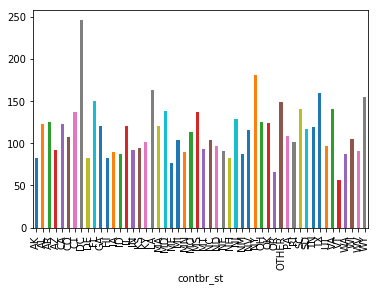

cand_nm
Jindal, Bobby                1675.943706
Pataki, George E.            1479.152915
Christie, Christopher J.     1407.036595
Perry, James R. (Rick)       1359.849406
Gilmore, James S III         1256.675119
Bush, Jeb                    1204.569985
Graham, Lindsey O.           1164.186996
Walker, Scott                 992.398766
O'Malley, Martin Joseph       781.807835
Santorum, Richard J.          680.648571
Kasich, John R.               585.145090
Webb, James Henry Jr.         549.058013
Lessig, Lawrence              467.395880
Rubio, Marco                  408.450564
Huckabee, Mike                391.450325
McMullin, Evan                276.886482
Johnson, Gary                 267.469490
Fiorina, Carly                243.094301
Stein, Jill                   227.169284
Paul, Rand                    196.138135
Trump, Donald J.              164.155848
Clinton, Hillary Rodham       133.359272
Cruz, Rafael Edward 'Ted'     128.912020
Carson, Benjamin S.           118.470909
Sanders,

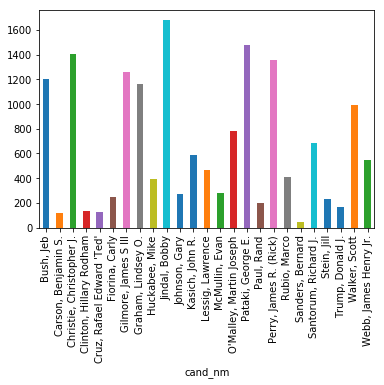

cand_party
Independent    276.886482
Libertarian    267.469490
Green          227.169284
Republican     197.167903
Democrat       102.351772
Name: contb_receipt_amt, dtype: float64


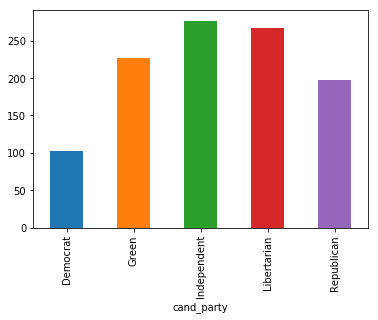

In [38]:
#df.groupby('contbr_st').contb_receipt_amt.mean().sort_values(ascending = False)

def examine_mean_contbr_by(df, groupby):
    print(df.groupby(groupby).contb_receipt_amt.mean().sort_values(ascending = False))
    df.groupby(groupby).contb_receipt_amt.mean().plot(kind = 'bar')
    plt.show()
    
examine_mean_contbr_by(df, 'contbr_st')
examine_mean_contbr_by(df, 'cand_nm')
examine_mean_contbr_by(df, 'cand_party')

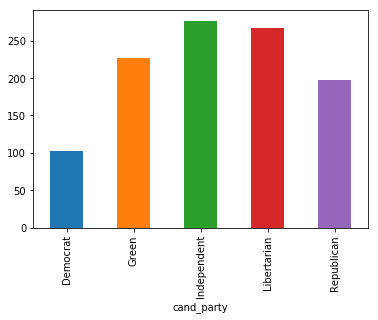

In [36]:
df.groupby('cand_party').contb_receipt_amt.mean().plot(kind = 'bar')
df.groupby('cand_party').contb_receipt_amt.mean().plot(kind = 'bar')

In [ ]:
df.contb_receipt_amt.min()
df[df.contb_receipt_amt == df.contb_receipt_amt.min()]
df[df.contbr_nm == 'CARANGI, JOE'].groupby('contbr_nm').count()
#df.cand_nm.value_counts(dropna = False)
#df.contb_receipt_amt.value_counts(dropna = False)

In [ ]:
from collections import Counter
from tqdm import tqdm

#occupations_count = Counter(list(df['contbr_occupation']))
#print(occupations_count.most_common(5))

def find_most_common(df):
    
    most_common_list = []
    
    for column in tqdm(df.columns.values):
        column_count = Counter(list(df[column]))
        most_common_list.append(column_count.most_common(25))
    
    print(most_common_list)

find_most_common(df)

In [ ]:
def print_unique_values(df):
    for column in df.columns.values:
        pp.pprint(column + '(' + str(len(df[column].unique())) + '): ' + str(df[column].unique()))
        print('')

print_unique_values(df)

In [ ]:
df.drop(['cmte_id', 'cand_id', 'contbr_nm', 'memo_cd', 'form_tp', 'file_num', 'tran_id'], axis = 1, inplace = True)
print(df.shape)
df.head()

In [ ]:
df[df.contb_receipt_amt > 2700]

In [ ]:
df[df.contbr_employer == 'COLSA CORPORATION']

In [ ]:
plt.hist(list(df.loc[:, 'contb_receipt_amt']))
#list(df.loc[0:10, 'contb_receipt_amt'])